In [1]:
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import random

existing_skill_levels = np.arange(0,10,1, dtype=float)
print(existing_skill_levels)
# 0 représente une compétence très peu développée, 9 une maîtrise absolue 

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [2]:
#Un skill level est le niveau théta dans une compétence
#Dans la réalité, il n'est pas connu et c'est lui que l'on doit établir. 
#Cependant, on l'utilise ici simplement pour jouer le rôle de l'utilisateur 
#qui ne choisira PAS les réponses d'une matière aléatoire dans une situation réelle.
skill_levels = {
    "a": random.choice(existing_skill_levels),
    "b": random.choice(existin0.4634932g_skill_levels),
    "c": random.choice(existing_skill_levels),
    "d": random.choice(existing_skill_levels),
    "e": random.choice(existing_skill_levels)
}
pprint(skill_levels)

{'a': 3.0, 'b': 9.0, 'c': 2.0, 'd': 4.0, 'e': 4.0}


In [47]:
test_set = {
	"easy": { #Level 0-3
		"a":[0,3], #Les exercices 0 et 3 sont faciles au niveau de la compétence a
		"b":[0,4],
		"c":[1,2],
		"d":[4,5],
		"e":[1,3],
	},

	"intermediate": { #Level 4-6
		"a":[2,4],
		"b":[1,2],
		"c":[4,5],
		"d":[3,0],
		"e":[0,5],
	},

	"hard": { #Level 7-9
		"a":[1,5], #Les exercices 1 et 5 sont difficiles au niveau de la compétence a
		"b":[3,5],
		"c":[3,0],
		"d":[1,2],
		"e":[2,4],
	}

}


exercices = [
    #format [a,b]
    #a est le paramètre de discrimination sur un item
    #b est la difficulté sur un item l'exercice
    { #0
    "a":[5,1],
    "b":[5,1],
    "c":[5,8],
    "d":[5,6],
    "e":[5,5],
    },
    { #1
    "a":[5,8],
    "b":[5,5],
    "c":[5,1],
    "d":[5,8],
    "e":[5,2],
    },
    { #2
    "a":[5,5],
    "b":[5,6],
    "c":[5,1],
    "d":[5,7],
    "e":[5,9],
    },
    { #3
    "a":[5,1],
    "b":[5,7],
    "c":[5,9],
    "d":[5,5],
    "e":[5,3],
    },
    { #4
    "a":[5,5],
    "b":[5,2],
    "c":[5,4],
    "d":[5,1],
    "e":[5,7],
    },
    { #5
    "a":[5,7],
    "b":[5,8],
    "c":[5,5],
    "d":[5,2],
    "e":[5,4],
    },
]


In [5]:
def evaluateProba(t, a, b):
    return 1 / (1 + np.exp(a*(b-t)))

In [2]:
def evaluateRasch(t, a, b):
    return np.exp(t-b)/(1+np.exp(t-b))

In [158]:
estimated_skill_levels = { #On veut que ce tableau tende vers "skill_levels"
    "a": 4.,
    "b": 4.,
    "c": 4.,
    "d": 4.,
    "e": 4.
}

steps = 1

for i in range(steps):
    for exo in exercices:
        for skill in exo.keys():
            a = exo[skill][0]
            b = exo[skill][1]
            success = random.random() < evaluateProba(skill_levels[skill], a, b)
            #print("Difficulté : %d | Niveau élève : %d | Chances de réussir : %.2f" % (b, skill_levels[skill], evaluateProba(skill_levels[skill], a, b)))
            #print("Niveau avant : %.f" % estimated_skill_levels[skill])
            if success:
                estimated_skill_levels[skill] += np.abs((b-estimated_skill_levels[skill])/2)
                if(estimated_skill_levels[skill] > 9):
                    estimated_skill_levels[skill] = 9.
            else:
                if(estimated_skill_levels[skill] > b):
                    estimated_skill_levels[skill] -= 1+(estimated_skill_levels[skill]-b)
            
            #print("Niveau après : %.f" % estimated_skill_levels[skill])

print(estimated_skill_levels)
print(skill_levels)

{'a': 4.0, 'b': 9.0, 'c': 3.0, 'd': 9.0, 'e': 3.875}
{'a': 3.0, 'b': 9.0, 'c': 2.0, 'd': 4.0, 'e': 4.0}


[0.27]


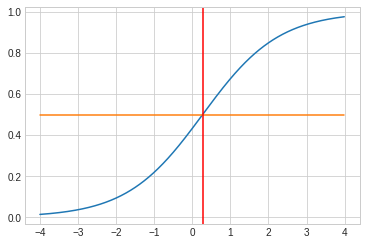

In [3]:
t = np.arange(-4, 4, 0.01)
t0 = np.zeros(len(t)) + 0.5
a = 1.3707
b = 0.2713
f = evaluateRasch(t, a, b)
plt.style.use('seaborn-whitegrid')
plt.axes()
#plt.plot(t, evaluateProba(t, a, b))
plt.plot(t, f)
plt.plot(t, t0)

idx = np.argwhere(np.diff(np.sign(f - t0))).flatten()
plt.axvline(x=t[idx], color='r')
print(t[idx])
plt.show()

In [4]:
values = [-0.2447, 1.3707, -0.1657, -1.4273, -0.0082, 1.8899, 0.0705, -0.0870, 0.1889, 0.7627, -0.4848, 0.0311, -0.1656, 1.3706, 0.2687, -0.2845, -0.9492, -0.4043, 0.9655]
np.mean(values)
np.sum(values)

2.6973